In [1]:
from DNC_predict import predict_label, pre_matt

Load template worm and test worm

In [2]:
temp_f = '../Data/Example/template.data'
test_f = '../Data/Example/test.data'
temp = pre_matt(temp_f)  #load python dictinary from a pickle file.
test = pre_matt(test_f)
# template worm contains pts, color(can be None) and label
temp_pos = temp['pts']
temp_label = temp['name']
temp_color = temp['color']
# test worm contains pts, color(can be None)
test_pos = test['pts']
test_color = test['color']

In [3]:
# the model can works with/without gpu(cuda=True/False)
test_label, candidate_list = predict_label(temp_pos, temp_label, test_pos, temp_color, 
                                           test_color, cuda=False)

test_label saves the label assigned with our fDLC model together with the confidence for that assignment.

In [4]:
test_label

[('AMSOR', 0.9886385151846969),
 ('I1L', 0.9990559986664871),
 ('I1R', 0.9999968160208046),
 ('AMSOL', 0.9993192826593288),
 ('', 0.0009504509092602211),
 ('', 0.00031777581111193235),
 ('', 6.803010223412762e-08),
 ('IL2VL', 0.9999999533330048),
 ('I2L', 0.9999993049926956),
 ('', 5.098459319403261e-05),
 ('', 0.0005960324638794384),
 ('I3', 0.0559946163985633),
 ('I2R', 0.9999999872454973),
 ('IL1DL', 5.128980611176256e-10),
 ('IL2DR', 0.9999999911893411),
 ('', 0),
 ('IL2DL', 0.9994646062428801),
 ('M3L', 0.9999999888276466),
 ('M3R', 0.9999999999304892),
 ('IL2VR', 5.121760750850125e-05),
 ('', 0),
 ('URADL', 0.9999834835437144),
 ('IL1VL', 0.9978651634615315),
 ('OLLL', 0.6506543406232123),
 ('OLLR', 0.9999999981043084),
 ('IL1VR', 0.9985373014635248),
 ('URYDL', 0.9999339829793739),
 ('URYDR', 0.9978490318523852),
 ('URBL', 0.9999999662576632),
 ('IL1DR', 0.970456553948699),
 ('URYVL', 0.9997631418402048),
 ('OLQDR', 0.9999999999851947),
 ('URBR', 1.6334979817952802e-06),
 ('URAV

The candidate_list gives the top 5 labels for the neuron together with their confidence.

In [5]:
candidate_list

[[('AMSOR', 0.9886385151846969),
  ('AMSOL', 0.011300007211509042),
  ('OLQDR', 3.775745314719714e-05),
  ('ASGR', 2.0884821320672773e-05),
  ('SMDVR', 2.563388496739827e-06)],
 [('I1L', 0.9990559986664871),
  ('I1R', 0.0009406660034552686),
  ('IL2VL', 3.2585934558142495e-06),
  ('', 3.6527107080858034e-08),
  ('AMSOR', 3.239623472975902e-08)],
 [('I1R', 0.9999968160208046),
  ('I2R', 3.160830672490869e-06),
  ('AMSOR', 1.923008511415334e-08),
  ('I1L', 2.5104918589389606e-09),
  ('CEPVR', 9.64642678112358e-10)],
 [('AMSOL', 0.9993192826593288),
  ('AMSOR', 0.0006805439929169066),
  ('IL2VL', 1.0319760666211821e-07),
  ('URXL', 2.9932890258971746e-08),
  ('', 2.98859827275177e-08)],
 [('', 0.9943575611607994),
  ('', 0.0035760965459799596),
  ('', 0.0009504509092602211),
  ('RMER', 0.0006249870204680412),
  ('', 0.0004907454939597923)],
 [('', 0.9875514454858355),
  ('', 0.011694607270578534),
  ('I1R', 0.0004296828417955896),
  ('', 0.00031777581111193235),
  ('', 3.978422758634168e-

Plot template worm with Label

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


Text(0.5, 0.92, 'template worm')

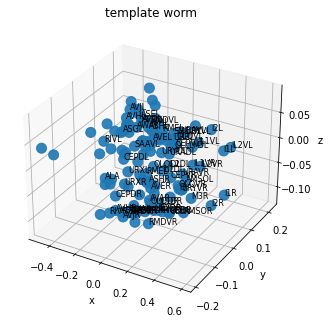

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(temp_pos[:, 0], temp_pos[:, 1], temp_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(temp_pos)):
    ax.text(temp_pos[i, 0], temp_pos[i, 1], temp_pos[i, 2], temp_label[i], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('template worm')


Plot test worm with label predicted by model

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


Text(0.5, 0.92, 'test worm')

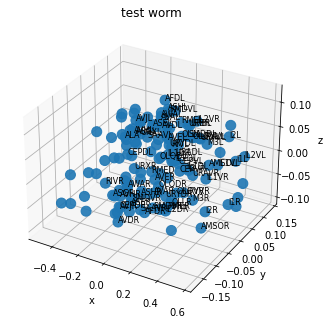

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(test_pos[:, 0], test_pos[:, 1], test_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(test_pos)):
    ax.text(test_pos[i, 0], test_pos[i, 1], test_pos[i, 2], test_label[i][0], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('test worm')